In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvo as vo
from IPython.display import Image as ipImage, display
from astropy.io import fits
import astropy.units as u
from astropy.coordinates import SkyCoord
from matplotlib.colors import LogNorm
import sys
from astropy.visualization import make_lupton_rgb
from astropy.wcs import WCS
from astroquery.vizier import Vizier
from astropy.coordinates import Angle

In [2]:
hudf = []
hudf_header = []
xmin = 4000
xmax = 6500
ymin = 4000
ymax = 6500
print('Loading Hubble UDF fits files...')
for i, c in enumerate(['i', 'v', 'b']):
    txt = f'\r    Loading {c} image'
    sys.stdout.write(txt)
    sys.stdout.flush()
    with fits.open(f'data/h_udf_wfc_{c}_drz_img.fits') as hdul:
        #hudf.append(hdul[0].data[xmin:xmax,ymin:ymax])
        hudf.append(hdul[0].data)
        hudf_header.append(hdul[0].header)
print('')
print('Finished Loading')

Loading Hubble UDF fits files...
    Loading b image
Finished Loading


In [3]:
hudf[0].shape

(10500, 10500)

In [4]:
wcs = WCS(hudf_header[0])

In [5]:
r = hudf[0] * 0.6
g = hudf[1] * 0.3
b = hudf[2] * 0.9
t =  0.001
r[r > t] = t
g[g > t] = t
b[b > t] = t

# hudf_rgb = make_lupton_rgb(r, g, b, Q=0.00001, stretch=0.0012, filename='hudf.jpeg')

# fig = plt.figure(figsize=(12,12))
# axes = fig.add_subplot(111, projection=wcs)
# axes.imshow(hudf_rgb, origin='lower')
#axes.scatter(pixel_coords[0], pixel_coords[1], s=1)

In [6]:
hudf_rgb = make_lupton_rgb(r, g, b, Q=0.0001, stretch=0.001, filename='hudf.jpeg')

 UDF  __CBS2006_  z   RAJ2000    DEJ2000   ... Pzph1   zph2  Pzph2  Simbad
                        deg        deg     ...                            
----- ---------- --- ---------- ---------- ... ------ ------ ------ ------
    9          1      53.165508 -27.828486 ...  0.948  0.242  0.948 Simbad
   12      50023      53.163862 -27.830681 ...  0.995  0.315  0.996 Simbad
   16      50074      53.164597 -27.831159 ...  0.293  3.017  0.872 Simbad
   17      50060      53.164513 -27.830915 ...  0.752  2.918  0.996 Simbad
   19      50081      53.163485 -27.831061 ...  0.422  3.183  0.058 Simbad
   21      50086      53.165058 -27.830858 ...  0.489  1.503  0.826 Simbad
   24      50096      53.165076 -27.830736 ...  0.535  2.693  0.993 Simbad
   30      50122      53.164880 -27.830432 ...  0.294  1.886  0.754 Simbad
   34      50139      53.162886 -27.829471 ...  0.990  1.825  1.000 Simbad
   35      50097      53.166197 -27.829805 ...  0.681  1.740  0.999 Simbad
  ...        ... ...     

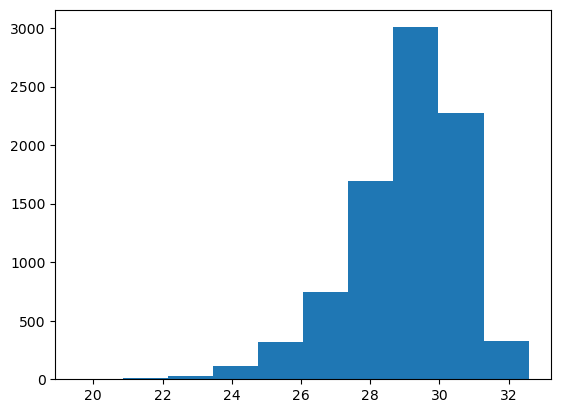

In [21]:
Vizier.ROW_LIMIT = 10000
catalog_name = 'J/AJ/150/31'
catalog = Vizier.get_catalogs(catalog_name)
photo_z_catalog = catalog[0]
print(photo_z_catalog)
print(photo_z_catalog.keys())
plt.hist(photo_z_catalog['F435W'])
photo_z_catalog = photo_z_catalog[np.where(photo_z_catalog['F606W']<25)]
photo_z1 = photo_z_catalog['zph1']
photo_z2 = photo_z_catalog['zph2']
ra = photo_z_catalog['RAJ2000']
dec = photo_z_catalog['DEJ2000']


In [22]:
coords = SkyCoord(ra, dec)
pixel_coords = wcs.world_to_pixel(coords)
print(coords.size)
print(pixel_coords[0])

283
[4931.66992856 5106.43481388 5486.47237798 5269.39644978 5330.85725447
 4758.51701132 5951.8292296  4270.84624572 6112.9087064  4175.73732932
 5335.32464223 4691.63379066 5042.66851042 5248.82892921 3975.88809199
 6121.54628372 4118.8788795  6588.37927252 3780.6949389  5604.91326878
 4648.16447199 3988.15935169 6400.43007607 3401.62350979 3658.33939971
 7098.1663044  6188.41195339 7898.01369691 5818.2937684  7879.65681422
 4065.6630151  7007.06816166 4662.03656224 5012.00862547 5284.16755545
 6450.27385894 7557.12747433 7581.01186633 7466.47210945 7558.39266381
 5343.61407561 5803.82758706 4783.08876533 5071.4510237  6088.71347623
 3219.31430263 6386.56767863 2746.47506272 6305.97891917 6410.83204935
 6448.80949274 5745.51784072 5744.82943821 5774.76000309 1480.05279009
 4622.23192822 8092.65113993 6404.90462522 5377.09338092 5374.13331775
 4720.41127526 5740.24491936 5015.08111267 4982.14574788 5261.15432075
 3273.05412526 5337.72295403 6789.70692228 1729.8287734  1933.02956792
 3

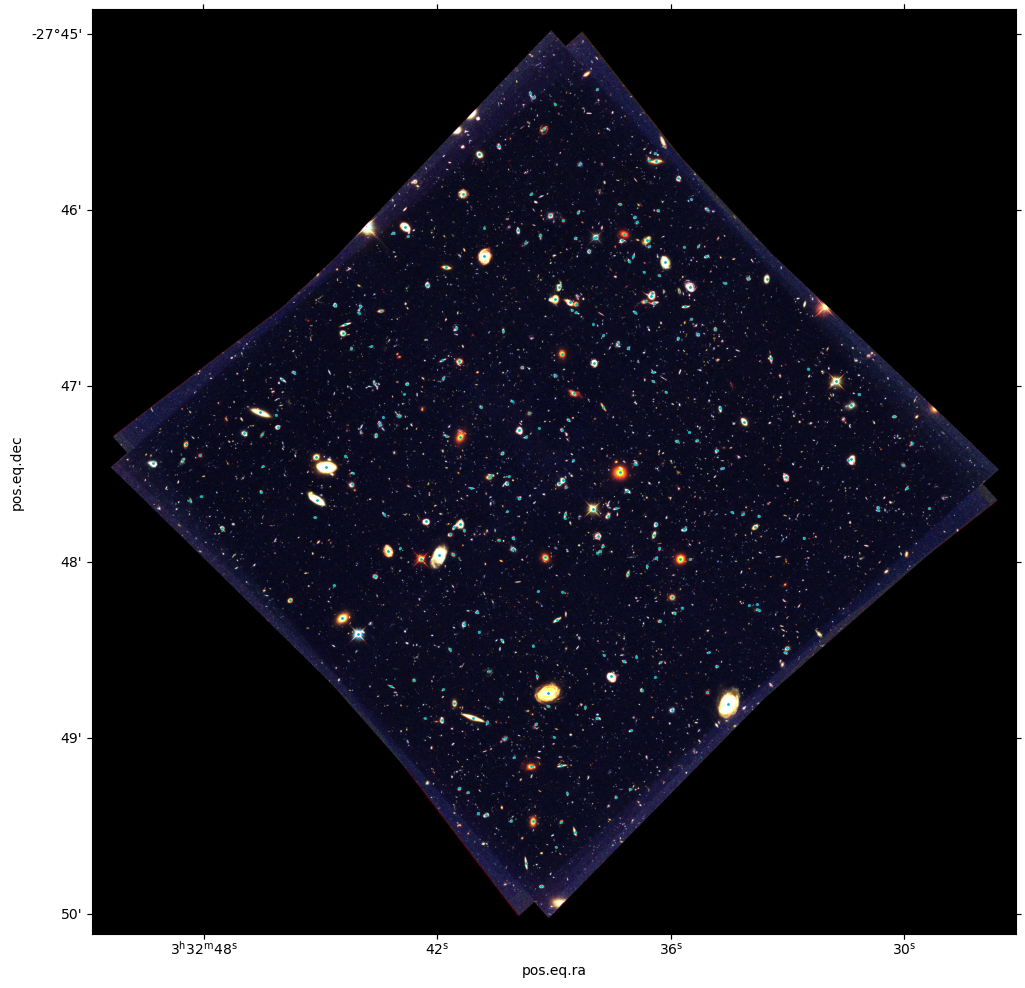

In [23]:
fig = plt.figure(figsize=(12,12))
axes = fig.add_subplot(111, projection=wcs)
axes.imshow(hudf_rgb, origin='lower')
axes.scatter(pixel_coords[0], pixel_coords[1], s=1, c='c')#, facecolors='none', edgecolors='m')

In [8]:
services = vo.regsearch(keywords='hubble udf')
services.to_table()['ivoid','short_name','res_title']

ivoid,short_name,res_title
object,object,object
ivo://cds.vizier/ii/258,II/258,Hubble Ultra Deep Field Catalog (UDF)
ivo://cds.vizier/j/aj/132/926,J/AJ/132/926,Galaxies in the Hubble Ultra Deep Field
ivo://cds.vizier/j/aj/150/31,J/AJ/150/31,Photometry and redshifts of galaxies in the UDF
ivo://cds.vizier/j/apj/612/l93,J/ApJ/612/L93,Candidates of z~5.5-7 galaxies in the HST-UDF
ivo://cds.vizier/j/apj/624/l5,J/ApJ/624/L5,IR photometry of z~10 galaxies in NICMOS fields
ivo://cds.vizier/j/apj/631/85,J/ApJ/631/85,Galaxy morphologies in the Hubble UDF
ivo://cds.vizier/j/apj/639/724,J/ApJ/639/724,Tadpole galaxies in the Hubble UDF
ivo://mast.stsci/siap/hst.udf,HST.UDF,HST Ultra Deep Field (UDF) Images
ivo://mast.stsci/siap/udfuv,HST.udfuv,Hubble Space Telescope Ultraviolet Images of the UDF and HDF


In [9]:
coord = SkyCoord('3 32 38.92 -27 47 29.37', unit=(u.hourangle, u.degree))
coord

<SkyCoord (ICRS): (ra, dec) in deg
    (53.16216667, -27.79149167)>

In [12]:
im_table = services[2].search(pos=coord)
im_table.to_table()

_r,recno,UDF,RAJ2000,DEJ2000,zsp,r_zsp,zph1,e_zph1,E_zph1,chi2m,Pzph1,zph2,e_zph2,E_zph2,chi2r,Pzph2,SimbadName
,,,deg,deg,,,,,,,,,,,,,
float64,int32,str5,float64,float64,float32,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str15
0.030771,1,373,53.15437485,-27.82148101,1.14,5,1.22,0.10,0.10,0.51,0.99,1.11,0.10,0.12,1.22,1.00,[CBS2006] 224
0.027765,2,534,53.16170093,-27.81925383,0.67,6,0.65,0.08,0.06,0.10,1.00,0.61,0.11,0.09,0.56,1.00,[CBS2006] 355
0.025879,3,865,53.17450843,-27.81495550,0.67,1,0.64,0.08,0.07,0.06,0.99,0.61,0.10,0.09,0.84,1.00,[CBS2006] 662
0.024990,4,983,53.14989262,-27.81400031,1.31,6,1.28,0.10,0.10,0.22,0.99,1.24,0.11,0.11,1.44,1.00,[CBS2006] 797
0.026427,5,1035,53.17634676,-27.81475285,2.44,6,2.42,0.15,0.15,0.68,1.00,1.99,1.94,0.13,7.85,0.93,[CBS2006] 830
0.022407,6,1060,53.15915906,-27.81374038,1.77,8,1.74,0.13,0.11,0.27,0.99,1.71,0.08,0.08,2.45,1.00,[CBS2006] 853
0.022732,7,1077,53.16529350,-27.81405511,3.06,2,3.32,0.19,0.18,0.73,1.00,3.04,0.17,0.29,1.03,1.00,[CBS2006] 865
0.022088,8,1134,53.16817307,-27.81293086,0.96,6,1.00,0.09,0.09,0.18,0.99,0.79,0.10,0.09,1.48,1.00,[CBS2006] 901


In [17]:
coord = SkyCoord('3h32m38.92s -27d47m29.37s', unit=(u.hourangle, u.degree))
coord

<SkyCoord (ICRS): (ra, dec) in deg
    (53.16216667, -27.79149167)>

In [ ]:
J/A+A/608/A2 MUSE
J/AJ/150/31 Rafelski 2015

In [16]:
catalog_list = Vizier.find_catalogs('Photometry and redshifts of galaxies in the UDF')
print({k:v.description for k,v in catalog_list.items()})

{'J/AJ/150/31': 'Photometry and redshifts of galaxies in the UDF (Rafelski+, 2015)'}


In [17]:
catalog = Vizier.get_catalogs(list(catalog_list.keys())[0])
catalog

TableList with 2 tables:
	'0:J/AJ/150/31/table5' with 20 column(s) and 50 row(s) 
	'1:J/AJ/150/31/table4' with 9 column(s) and 50 row(s) 

In [41]:
result = Vizier.query_region(coord, radius=Angle(4.0, 'arcmin'), catalog=catalog_name)
result

Empty TableList

In [9]:
from astroquery.sdss import SDSS

In [24]:
result = SDSS.query_region(coord, radius='2 arcsec')

In [25]:
print(result)

None
